# Trabajo Práctico 4 - Big Data UNT
## Clasificación y regularización de Desocupación usando la EPH

### Parte 1: Análisis de la base de hogares y tipo de ocupación

#### Ejercicio 2

In [1]:
import pandas as pd

In [3]:
#Cargamos la base de datos de los hogares de la EPH para el primer trimestre de 2004 y 2024

basehogar2004=pd.read_stata("/Users/vfuentesmortensen/Documents/GitHub/BigDataUNT-Grupo2/TP4/Hogar_t104.dta", convert_categoricals=False)
basehogar2024=pd.read_excel("/Users/vfuentesmortensen/Documents/GitHub/BigDataUNT-Grupo2/TP4/usu_hogar_T124.xlsx")
#basehogar2004=pd.read_stata("C:/Users/Guadalupe Gorostiaga/Desktop/MAESTRÍA UNT/5. Big Data/TPs/TP4/Hogar_t104.dta", convert_categoricals=False)
#basehogar2024=pd.read_excel("C:/Users/Guadalupe Gorostiaga/Desktop/MAESTRÍA UNT/5. Big Data/TPs/TP4/usu_hogar_T124.xlsx")

#Unificamos los nombres de las columnas de ambos data frames dejando todo en minúsculas
basehogar2004.columns=basehogar2004.columns.str.lower()
basehogar2024.columns=basehogar2024.columns.str.lower()

#Eliminamos los aglomerados que no sean Gran SMT y Tafí Viejo
basehogar2004=basehogar2004[basehogar2004['aglomerado']==29]
basehogar2024=basehogar2024[basehogar2024['aglomerado']==29]

In [4]:
#Cargamos la base de datos individuales de la EPH para el primer trimestre de 2004 y 2024

baseind2004=pd.read_stata("/Users/vfuentesmortensen/Documents/GitHub/BigDataUNT-Grupo2/TP4/usu_individual_T104.dta", convert_categoricals=False)
baseind2024=pd.read_excel("/Users/vfuentesmortensen/Documents/GitHub/BigDataUNT-Grupo2/TP4/usu_individual_T124.xlsx")
#baseind2004=pd.read_stata("C:/Users/Guadalupe Gorostiaga/Desktop/MAESTRÍA UNT/5. Big Data/TPs/TP4/usu_individual_T104.dta", convert_categoricals=False)
#baseind2024=pd.read_excel("C:/Users/Guadalupe Gorostiaga/Desktop/MAESTRÍA UNT/5. Big Data/TPs/TP4/usu_individual_T124.xlsx")

#Unificamos los nombres de las columnas de ambos data frame dejando todo en minúsculas
baseind2004.columns=baseind2004.columns.str.lower()
baseind2024.columns=baseind2024.columns.str.lower()

#Eliminamos los aglomerados que no sean Gran SMT y Tafí Viejo
baseind2004=baseind2004[baseind2004['aglomerado']==29]
baseind2024=baseind2024[baseind2024['aglomerado']==29]

In [5]:
#Observamos la estructura de las bases antes y después del filtrado de las observaciones

filas, columnas = basehogar2004.shape
print(f"Estructura de la base de hogares de 2004 es: {filas} filas y {columnas} columnas.")

filas, columnas = basehogar2024.shape
print(f"Estructura de la base de hogares de 2024 es: {filas} filas y {columnas} columnas.")

filas, columnas = baseind2004.shape
print(f"Estructura de la base de individuos de 2004 es: {filas} filas y {columnas} columnas.")

filas, columnas = baseind2024.shape
print(f"Estructura de la base de individuos de 2024 es: {filas} filas y {columnas} columnas.")

Estructura de la base de hogares de 2004 es: 661 filas y 88 columnas.
Estructura de la base de hogares de 2024 es: 639 filas y 88 columnas.
Estructura de la base de individuos de 2004 es: 2547 filas y 176 columnas.
Estructura de la base de individuos de 2024 es: 2109 filas y 177 columnas.


In [6]:
#Unimos las bases hogar con las bases individuales para cada año
base2004=pd.merge(basehogar2004, baseind2004, on=['codusu','nro_hogar'], how='left', suffixes=('', '_dup'))
base2024=pd.merge(basehogar2024, baseind2024, on=['codusu', 'nro_hogar'], how='left', suffixes=('', '_dup'))  

# Eliminamos las columnas duplicadas con el sufijo '_dup'
columnas_duplicadas = [col for col in base2004.columns if col.endswith('_dup')]
base2004.drop(columns=columnas_duplicadas, inplace=True)
base2024.drop(columns=columnas_duplicadas, inplace=True)

#Ahora unimos las bases en una sola
base = pd.concat([base2004, base2024], ignore_index=True)

filas, columnas = base2004.shape
print(f"Estructura de la base de 2004 es: {filas} filas y {columnas} columnas.")
filas, columnas = base2024.shape
print(f"Estructura de la base de 2024 es: {filas} filas y {columnas} columnas.")
filas, columnas = base.shape
print(f"Estructura de la base completa: {filas} filas y {columnas} columnas.")

Estructura de la base de 2004 es: 2547 filas y 242 columnas.
Estructura de la base de 2024 es: 2109 filas y 243 columnas.
Estructura de la base completa: 4656 filas y 248 columnas.


In [8]:
#Observamos y ordenamos la base
base = base[['codusu', 'nro_hogar', 'componente'] + [col for col in base.columns if col not in ['codusu', 'nro_hogar', 'componente']]]
base = base.sort_values(by=['codusu', 'nro_hogar', 'componente'])
base

,codusu,nro_hogar,componente,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,...,pj1_1,pj2_1,pj3_1,idimpp,pondih,ch05,imputa,pondiio,pondii,pondih_dup
0,125463,1.0,1.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
1,125463,1.0,2.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
2,125463,1.0,3.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
3,125463,1.0,4.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
4,125463,1.0,5.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,TQSMNOSXWHMMKQCDEHPJB00856905,1.0,4.0,1.0,2024.0,1.0,40.0,S,29.0,357.0,...,NaN,NaN,NaN,NaN,0.0,1999-12-18 00:00:00,NaN,0.0,0.0,0.0
3857,TQSMNOURSHMOKMCDEHPJB00859671,1.0,1.0,1.0,2024.0,1.0,40.0,S,29.0,572.0,...,NaN,NaN,NaN,NaN,567.0,1991-08-16 00:00:00,NaN,572.0,565.0,567.0
3856,TQSMNOURSHMOKMCDEHPJB00859671,1.0,2.0,1.0,2024.0,1.0,40.0,S,29.0,572.0,...,NaN,NaN,NaN,NaN,567.0,2022-03-13 00:00:00,NaN,572.0,572.0,567.0
3433,TQTMNOSTXHKOKNCDEHPJB00858768,1.0,1.0,1.0,2024.0,1.0,40.0,S,29.0,362.0,...,NaN,NaN,NaN,NaN,405.0,1959-09-23 00:00:00,NaN,362.0,358.0,405.0


In [12]:
#Queremos ver que la imputación haya sido correcta

# Agrupamos y tomamos el primer valor de 'itf'
valores = base.groupby(['codusu', 'nro_hogar'])['itf'].first()

# Verificamos si hay más de un valor por grupo
if (base.groupby(['codusu', 'nro_hogar'])['itf'].nunique() == 1).all():
    print("Todos los valores de 'itf' son constantes para cada combinación de 'codusu' y 'nro_hogar'.")
else:
    print("Hay combinaciones de 'codusu' y 'nro_hogar' con valores diferentes de 'itf'.")


Todos los valores de 'itf' son constantes para cada combinación de 'codusu' y 'nro_hogar'.


#### Ejercicio 3

In [16]:
# Visualizamos una descripción rápida de los datos para un subconjunto de variables de interés

#Rename de variables de interés
base.rename(columns={'iv1': 'tipo_vivienda', 'iv6': 'acceso_agua', 'iv8': 'tenencia_bano', 'iv9': 'acceso_bano', 'ch04': 'sexo', 'ch06': 'edad', 'ch07': 'estado_civil', 'ch08': 'cobertura_medica', 'ch10': 'asistencia_educ','iv12_1':'basural', 'iv12_3': 'villa', 'v14':'prestamos_flia', 'v15':'prestamos_inst'}, inplace=True)

base[['tipo_vivienda', 'acceso_agua', 'tenencia_bano','acceso_bano','itf', 'ipcf', 'sexo', 'edad', 'estado_civil', 'cobertura_medica', 'asistencia_educ', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'basural', 'villa','prestamos_flia', 'prestamos_inst']].describe()

,tipo_vivienda,acceso_agua,tenencia_bano,acceso_bano,itf,ipcf,sexo,edad,estado_civil,cobertura_medica,asistencia_educ,nivel_ed,estado,cat_ocup,cat_inac,basural,villa,prestamos_flia,prestamos_inst
count,4656.000000,4656.000000,4656.000000,4656.000000,4.656000e+03,4.656000e+03,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000
mean,1.236254,1.135524,1.019974,1.143041,2.252260e+05,6.050565e+04,1.522122,31.994416,3.666022,2.747208,1.679338,3.450387,2.342139,1.162371,1.976804,1.669459,1.964562,1.765893,1.881658
std,0.449399,0.356461,0.141454,0.407432,3.884766e+05,1.172145e+05,0.499564,21.692509,1.585221,2.357130,0.609670,1.884674,1.153891,1.393806,2.045849,0.470915,0.186063,0.423485,0.323047
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,4.050000e+02,8.666667e+01,1.000000,14.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.170000e+03,2.666667e+02,2.000000,28.000000,5.000000,2.000000,2.000000,3.000000,3.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,3.850000e+05,9.250000e+04,2.000000,48.000000,5.000000,4.000000,2.000000,5.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000
max,5.000000,3.000000,2.000000,3.000000,3.650000e+06,2.250000e+06,2.000000,97.000000,5.000000,23.000000,3.000000,7.000000,4.000000,4.000000,7.000000,2.000000,2.000000,2.000000,2.000000


In [18]:
#Tenemos personas con edades negativas, las eliminamos
base=base[base['edad']>=0] 

#Limpiamos outliers en las variables de ingreso total familiar e ingreso per capita familiar

#Tomamos el criterio de 2 desviaciones estándar de la media para filtrar los outliers. 
for col in ['itf', 'ipcf']:
     mean_values = base[col].mean()
     std_dev_values = base[col].std()

     lower_bound = mean_values - 2 * std_dev_values
     upper_bound = mean_values + 2 * std_dev_values

# Filtramos el DataFrame manteniendo solo los valores dentro de los límites
base = base[(base[col] >= lower_bound) & (base[col] <= upper_bound)]
base

,codusu,nro_hogar,componente,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,...,pj1_1,pj2_1,pj3_1,idimpp,pondih,ch05,imputa,pondiio,pondii,pondih_dup
0,125463,1.0,1.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
1,125463,1.0,2.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
2,125463,1.0,3.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
4,125463,1.0,5.0,1.0,2004.0,1.0,40.0,S,29.0,259.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
5,125571,1.0,2.0,1.0,2004.0,1.0,40.0,S,29.0,296.0,...,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,TQSMNOSXWHMMKQCDEHPJB00856905,1.0,4.0,1.0,2024.0,1.0,40.0,S,29.0,357.0,...,NaN,NaN,NaN,NaN,0.0,1999-12-18 00:00:00,NaN,0.0,0.0,0.0
3857,TQSMNOURSHMOKMCDEHPJB00859671,1.0,1.0,1.0,2024.0,1.0,40.0,S,29.0,572.0,...,NaN,NaN,NaN,NaN,567.0,1991-08-16 00:00:00,NaN,572.0,565.0,567.0
3856,TQSMNOURSHMOKMCDEHPJB00859671,1.0,2.0,1.0,2024.0,1.0,40.0,S,29.0,572.0,...,NaN,NaN,NaN,NaN,567.0,2022-03-13 00:00:00,NaN,572.0,572.0,567.0
3433,TQTMNOSTXHKOKNCDEHPJB00858768,1.0,1.0,1.0,2024.0,1.0,40.0,S,29.0,362.0,...,NaN,NaN,NaN,NaN,405.0,1959-09-23 00:00:00,NaN,362.0,358.0,405.0


In [24]:
# Revisamos el número de missing values luego de las correcciones de nuestros datos
subset=['tipo_vivienda', 'acceso_agua', 'tenencia_bano','acceso_bano','itf', 'ipcf', 'sexo', 'edad', 'estado_civil', 'cobertura_medica', 'asistencia_educ', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'basural', 'villa','prestamos_flia', 'prestamos_inst']
nulos = base[subset].isnull().sum()
print(nulos)

tipo_vivienda       0
acceso_agua         0
tenencia_bano       0
acceso_bano         0
itf                 0
ipcf                0
sexo                0
edad                0
estado_civil        0
cobertura_medica    0
asistencia_educ     0
nivel_ed            0
estado              0
cat_ocup            0
cat_inac            0
basural             0
villa               0
prestamos_flia      0
prestamos_inst      0
dtype: int64


#### Ejercicio 4

Computamos cuatro variables que pueden ser relevantes para predecir desocupación y no están en la base.

In [26]:
#Uno: Proporción de personas ocupadas en el hogar

# Contamos la cantidad de personas ocupadas por hogar (numerador)
ocupados_por_hogar = base[base['estado'] == 1].groupby(['codusu', 'nro_hogar'])['estado'].count().reset_index()
ocupados_por_hogar.rename(columns={'estado': 'ocupados_por_hogar'}, inplace=True)

# Contamos el total de miembros del hogar (denominador)
total_miembros_por_hogar = base.groupby(['codusu', 'nro_hogar'])['estado'].count().reset_index()
total_miembros_por_hogar.rename(columns={'estado': 'total_miembros_por_hogar'}, inplace=True)

# Unimos ambos dataframes
proporciones = pd.merge(total_miembros_por_hogar, ocupados_por_hogar, on=['codusu', 'nro_hogar'], how='left')
print(proporciones) #ocupados_por_hogar genera missing values cuando no hay personas ocupadas en el hogar

# Reemplazamps los NaN con 0 en 'ocupados_por_hogar'
proporciones['ocupados_por_hogar'] = proporciones['ocupados_por_hogar'].fillna(0)

# Calculamos la proporción
proporciones['proporcion_ocupados_hogar'] = proporciones['ocupados_por_hogar'] / proporciones['total_miembros_por_hogar']

# Agregamos esta nueva variable al dataframe base
base = pd.merge(base, proporciones[['codusu', 'nro_hogar', 'proporcion_ocupados_hogar']], on=['codusu', 'nro_hogar'], how='left')

# Verificamos los resultados
print(base['proporcion_ocupados_hogar'])

                             codusu  nro_hogar  total_miembros_por_hogar  \
0                          125463          1.0                         4   
1                          125571          1.0                         4   
2                          125591          1.0                         3   
3                          126052          1.0                         2   
4                          126339          1.0                         1   
...                             ...        ...                       ...   
1211  TQSMNOSTXHKOKNCDEHPJB00857737        1.0                         4   
1212  TQSMNOSVQHJOMMCDEHPJB00795313        1.0                         5   
1213  TQSMNOSXWHMMKQCDEHPJB00856905        1.0                         4   
1214  TQSMNOURSHMOKMCDEHPJB00859671        1.0                         2   
1215  TQTMNOSTXHKOKNCDEHPJB00858768        1.0                         2   

      ocupados_por_hogar  
0                    1.0  
1                    2.0  
2     

In [28]:
print("Cantidad de missing values en proporcion_ocupados_hogar: ", base['proporcion_ocupados_hogar'].isna().sum())
print("Cantidad de missing values en ocupados_por_hogar: ", proporciones['ocupados_por_hogar'].isnull().sum())
print("Cantidad de missing values en total_miembros_por_hogar: ", proporciones['total_miembros_por_hogar'].isnull().sum())

Cantidad de missing values en proporcion_ocupados_hogar:  0
Cantidad de missing values en ocupados_por_hogar:  0
Cantidad de missing values en total_miembros_por_hogar:  0


In [30]:
#Dos: Nivel educativo alcanzado

# Creamos tres variables binarias, una para cada categoría educativa

base['educ_bajo'] = base['nivel_ed'].apply(lambda x: 1 if x in [1, 7, 9] else 0)
base['educ_medio'] = base['nivel_ed'].apply(lambda x: 1 if x in [2, 3] else 0)
base['educ_alto'] = base['nivel_ed'].apply(lambda x: 1 if x in [4, 5, 6] else 0)

# Verificamos los resultados y que no hayan missing values
print(base[['educ_bajo', 'educ_medio', 'educ_alto','nivel_ed']])
print("Cantidad de missing values en cada categoría: ", base[['educ_bajo', 'educ_medio', 'educ_alto']].isna().sum())

      educ_bajo  educ_medio  educ_alto  nivel_ed
0             0           0          1       4.0
1             0           0          1       5.0
2             1           0          0       1.0
3             1           0          0       1.0
4             1           0          0       1.0
...         ...         ...        ...       ...
4431          0           0          1       4.0
4432          0           1          0       2.0
4433          1           0          0       7.0
4434          0           1          0       2.0
4435          0           0          1       4.0

[4436 rows x 4 columns]
Cantidad de missing values en cada categoría:  educ_bajo     0
educ_medio    0
educ_alto     0
dtype: int64


In [32]:
#Tres: Hacinamiento 

# Primero removemos las observaciones que no declaran ningún ambiente de uso exclusivo en el hogar
print(base['ii1'].describe())
base = base[base['ii1'] != 0]
print("base shape:", base.shape)  # (filas, columnas)

count    4436.000000
mean        3.196799
std         1.366634
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: ii1, dtype: float64
base shape: (4422, 252)


In [34]:
# Contamos la cantidad de ambientes/habitaciones que tiene el hogar
ambientes_hogar = base.groupby(['codusu', 'nro_hogar'])['ii1'].mean().reset_index()
ambientes_hogar.rename(columns={'ii1': 'ambientes_hogar'}, inplace=True)

# Contamos el total de miembros del hogar
total_miembros_por_hogar = base.groupby(['codusu', 'nro_hogar'])['ii1'].count().reset_index()
total_miembros_por_hogar.rename(columns={'ii1': 'total_miembros_por_hogar'}, inplace=True)

# Unimos ambos dataframes
densidad_habitacion = pd.merge(total_miembros_por_hogar, ambientes_hogar, on=['codusu', 'nro_hogar'], how='left')

# Eliminamos los hogares con ambientes cero
#print(densidad_habitacion[densidad_habitacion['ambientes_hogar'] == 0])
#densidad_habitacion = densidad_habitacion[densidad_habitacion['ambientes_hogar'] != 0]

# Calculamos la proporción
densidad_habitacion['densidad_habitacion'] = densidad_habitacion['total_miembros_por_hogar'] / densidad_habitacion['ambientes_hogar']

# Unimos las proporciones al DataFrame original
base = pd.merge(base, densidad_habitacion[['codusu', 'nro_hogar', 'densidad_habitacion']],
                on=['codusu', 'nro_hogar'], how='left')

print(base['densidad_habitacion'])
print("Cantidad de missing values en categoria_educacion: ", base['densidad_habitacion'].isna().sum())

0       1.333333
1       1.333333
2       1.333333
3       1.333333
4       0.800000
          ...   
4417    1.333333
4418    2.000000
4419    2.000000
4420    0.666667
4421    0.666667
Name: densidad_habitacion, Length: 4422, dtype: float64
Cantidad de missing values en categoria_educacion:  0


In [36]:
#Cuarta: Índice de carga familiar (incluye menores de 6 años, discapacitados y adultos mayores-jubilados-)

# Contamos la cantidad personas menores de 6 años, discapacitados y jubilados que tiene cada hogar (numerador)
dependientes_hogar = base[(base['cat_inac'] == 1) | (base['cat_inac'] == 5) | (base['cat_inac'] == 6)].groupby(['codusu', 'nro_hogar'])['cat_inac'].count().reset_index()
dependientes_hogar.rename(columns={'cat_inac': 'dependientes_hogar'}, inplace=True)

# Contamos el total de miembros del hogar (denominador)
total_miembros_por_hogar = base.groupby(['codusu', 'nro_hogar'])['cat_inac'].count().reset_index()
total_miembros_por_hogar.rename(columns={'cat_inac': 'total_miembros_por_hogar'}, inplace=True)

# Unimos ambos dataframes
dependientes_hogar = pd.merge(total_miembros_por_hogar, dependientes_hogar, on=['codusu', 'nro_hogar'], how='left')
print(dependientes_hogar) #dependientes_hogar genera missing values cuando no hay personas dependientes en el hogar

# Reemplazamos los NaN con 0 en 'dependientes_hogar'
dependientes_hogar['dependientes_hogar'] = dependientes_hogar['dependientes_hogar'].fillna(0)

# Paso 5: Calcular la proporción
dependientes_hogar['prop_dependientes_hogar'] = dependientes_hogar['dependientes_hogar'] / dependientes_hogar['total_miembros_por_hogar']

# Paso 6: Unir las proporciones al DataFrame original
base = pd.merge(base, dependientes_hogar[['codusu', 'nro_hogar', 'prop_dependientes_hogar']], on=['codusu', 'nro_hogar'], how='left')

# Verificar los resultados
print(base['prop_dependientes_hogar'])
print("Cantidad de missing values en prop_dependientes_hogar:", base['prop_dependientes_hogar'].isna().sum())


                             codusu  nro_hogar  total_miembros_por_hogar  \
0                          125463          1.0                         4   
1                          125571          1.0                         4   
2                          125591          1.0                         3   
3                          126052          1.0                         2   
4                          126339          1.0                         1   
...                             ...        ...                       ...   
1197  TQSMNOSTXHKOKNCDEHPJB00857737        1.0                         4   
1198  TQSMNOSVQHJOMMCDEHPJB00795313        1.0                         5   
1199  TQSMNOSXWHMMKQCDEHPJB00856905        1.0                         4   
1200  TQSMNOURSHMOKMCDEHPJB00859671        1.0                         2   
1201  TQTMNOSTXHKOKNCDEHPJB00858768        1.0                         2   

      dependientes_hogar  
0                    1.0  
1                    NaN  
2     

In [38]:
#Creamos un cuadro que resuma las estadísticas descriptivas
resumen_created=base[['proporcion_ocupados_hogar', 'educ_bajo', 'educ_medio', 'educ_alto', 'densidad_habitacion', 'prop_dependientes_hogar', 'cat_inac']].describe()

resumen_created.to_excel('resumen_descriptivo.xlsx', index=True) #Exportamos a un excel

#### Ejercicio 5

In [198]:
#Creamos un cuadro que resuma las estadísticas descriptivas de 5 variables relevantes para predecir desempleo
resumen_base=base[['acceso_agua', 'tenencia_bano','itf', 'prestamos_flia', 'prestamos_inst']].describe()

resumen_base.to_excel('resumen_base.xlsx', index=True) #Exportamos a un excel

#Calculamos algunas proporciones
def proporcion_bano(base):
    total_bano = base[(base['tenencia_bano'] == 1)]
    total_muestra = base
    
    proporcion = (total_bano['tenencia_bano'].count() / total_muestra['tenencia_bano'].count()) * 100
    return proporcion


#Definimos una función para calcular la proporción de inactivos por año
def proporcion_agua_afuera(base):
    total_agua_afuera = base[(base['acceso_agua'] == 2) | (base['acceso_agua'] == 3)]
    total_muestra = base
    
    proporcion2 = (total_agua_afuera['tenencia_bano'].count() / total_muestra['tenencia_bano'].count()) * 100
    return proporcion2


# Mostrar proporciones de inactivos para cada año
print(f'Proporción con baño: {proporcion_bano(base):.2f}%')
print(f'Proporción con agua afuera: {proporcion_agua_afuera(base):.2f}%')

Proporción con baño: 97.85%
Proporción con agua afuera: 13.55%


#### Ejercicio 6

In [44]:
#Tasa de desocupación con el PONDERA
import numpy as np
#Agregamos una columna llamada PEA  a nuestra base que toma 1 si están ocupados o desocupados en ESTADO

base['pea'] = np.where((base['estado']==1) | (base['estado']==2), 1, 0)

base2024_pea = base[(base['ano4']==2024) & (base['pea']==1)]

# Nos quedamos con una observacion por hogar
hogares2024 = base2024_pea.groupby(['codusu', 'nro_hogar']).sample(n=1)

#Creamos la variable desocupados
hogares2024['desocupado'] = np.where((hogares2024['estado']==2), 1, 0)

# Calcular la suma ponderada de hogares desocupados
hogares_desocupados_ponderados = (hogares2024['desocupado'] * hogares2024['pondera']).sum()

# Calcular la suma total de ponderadores
total_hogares_ponderador = hogares2024['pondera'].sum()

# Calcular la tasa de hogares con desocupación ponderada
desocupacion_hogares = hogares_desocupados_ponderados / total_hogares_ponderador

# Imprimir la tasa
print(f'Tasa de hogares con desocupación en el primer trimestre de 2024 (ponderada): {desocupacion_hogares * 100:.2f}%')
print(f'Tasa de desocupación en el primer trimestre de 2024 según INDEC: 7.7%')

Tasa de hogares con desocupación en el primer trimestre de 2024 (ponderada): 7.74%
Tasa de desocupación en el primer trimestre de 2024 según INDEC: 7.7%


### Parte 2: Clasificación y regularización

#### Ejercicio 1

In [48]:
#Creamos una variable binaria de desocupados en nuestra base

base['desocupado'] = np.where((base['estado']==2), 1, 0)

#Creamos la base de respondieron

respondieron=base.loc[base['estado']!=0].copy()

In [50]:
#Partimos la base respondieron según el año

# Subconjunto para el año 2004
respondieron_2004 = respondieron[respondieron['ano4'] == 2004]
print(respondieron_2004)

# Subconjunto para el año 2024
respondieron_2024 = respondieron[respondieron['ano4'] == 2024]

        codusu  nro_hogar  componente  realizada    ano4  trimestre  region  \
0     125463          1.0         1.0        1.0  2004.0        1.0    40.0   
1     125463          1.0         2.0        1.0  2004.0        1.0    40.0   
2     125463          1.0         3.0        1.0  2004.0        1.0    40.0   
3     125463          1.0         5.0        1.0  2004.0        1.0    40.0   
4     125571          1.0         2.0        1.0  2004.0        1.0    40.0   
...        ...        ...         ...        ...     ...        ...     ...   
2483  288280          1.0         3.0        1.0  2004.0        1.0    40.0   
2484  288280          1.0         4.0        1.0  2004.0        1.0    40.0   
2485  288280          1.0         5.0        1.0  2004.0        1.0    40.0   
2486  288337          1.0         1.0        1.0  2004.0        1.0    40.0   
2487  288337          1.0         2.0        1.0  2004.0        1.0    40.0   

     mas_500  aglomerado  pondera  ...  pondii pond

In [93]:
# Importamos la función train_test_split
from sklearn.model_selection import train_test_split

#Separamos las variables independientes de la que queremos predecir
X_2004 = respondieron_2004[['proporcion_ocupados_hogar', 'educ_bajo', 'educ_medio', 'educ_alto', 
                              'densidad_habitacion', 'prop_dependientes_hogar', 'sexo', 'edad', 
                              'acceso_agua', 'tenencia_bano', 'acceso_bano', 'itf', 
                              'cobertura_medica', 'basural', 'villa', 'prestamos_flia', 
                              'prestamos_inst']]
y_2004 = respondieron_2004['desocupado']

X_2024 = respondieron_2024[['proporcion_ocupados_hogar', 'educ_bajo', 'educ_medio', 'educ_alto', 
                              'densidad_habitacion', 'prop_dependientes_hogar', 'sexo', 'edad', 
                              'acceso_agua', 'tenencia_bano', 'acceso_bano', 'itf', 
                              'cobertura_medica', 'basural', 'villa', 'prestamos_flia', 
                              'prestamos_inst']]
y_2024 = respondieron_2024['desocupado']

#Dividimos los datos en conjuntos de entrenamiento y prueba, manteniendo el 70% en entrenamiento
X_2004_train, X_2004_test, y_2004_train, y_2004_test = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_2024_train, X_2024_test, y_2024_train, y_2024_test = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Transformamos las variables categóricas en dummies para facilitar su interpretación
X_2004_train_encoded = pd.get_dummies(X_2004_train, drop_first=True)
X_2004_test_encoded = pd.get_dummies(X_2004_test, drop_first=True)

X_2024_train_encoded = pd.get_dummies(X_2024_train, drop_first=True)
X_2024_test_encoded = pd.get_dummies(X_2024_test, drop_first=True)

# Alineamos los conjuntos de entrenamiento y prueba para asegurarnos de que tienen las mismas columnas
X_2004_train_encoded, X_2004_test_encoded = X_2004_train_encoded.align(X_2004_test_encoded, join='left', axis=1, fill_value=0)
X_2024_train_encoded, X_2024_test_encoded = X_2024_train_encoded.align(X_2024_test_encoded, join='left', axis=1, fill_value=0)

# Agregar una columna de unos y convertir directamente a DataFrame
X_2004_train_encoded = pd.DataFrame(X_2004_train_encoded.values, columns=X_2004_train_encoded.columns)
X_2004_train_encoded.insert(0, 'Intercept', 1)  

X_2004_test_encoded = pd.DataFrame(X_2004_test_encoded.values, columns=X_2004_test_encoded.columns)
X_2004_test_encoded.insert(0, 'Intercept', 1)  

X_2024_train_encoded = pd.DataFrame(X_2024_train_encoded.values, columns=X_2024_train_encoded.columns)
X_2024_train_encoded.insert(0, 'Intercept', 1)  

X_2024_test_encoded = pd.DataFrame(X_2024_test_encoded.values, columns=X_2024_test_encoded.columns)
X_2024_test_encoded.insert(0, 'Intercept', 1)  



#### Ejercicio 4

In [111]:
#Estandarizamos las variables

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_2004_train_encoded_tr = pd.DataFrame(sc.fit_transform(X_2004_train_encoded), index=X_2004_train_encoded.index, columns=X_2004_train_encoded.columns)
X_2024_train_encoded_tr = pd.DataFrame(sc.fit_transform(X_2024_train_encoded), index=X_2024_train_encoded.index, columns=X_2024_train_encoded.columns)

# Estandarizamos las observaciones de test
X_2004_test_encoded_tr = pd.DataFrame(sc.transform(X_2004_test_encoded), index=X_2004_test_encoded.index, columns=X_2004_test_encoded.columns)
X_2024_test_encoded_tr = pd.DataFrame(sc.transform(X_2024_test_encoded), index=X_2024_test_encoded.index, columns=X_2024_test_encoded.columns)


In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

Matriz de confusión 2004 (LASSO):
 [[424 276]
 [  6  39]]
Accuracy (LASSO) 2004 : 0.6214765100671141
AUC: 0.736
Thresholds: [       inf 0.99921508 0.9975052  0.99723249 0.9962597  0.99603677
 0.99440336 0.99285947 0.99281778 0.98863696 0.98835724 0.98821184
 0.98774764 0.9874091  0.98733022 0.98716229 0.98684338 0.98493464
 0.98338672 0.98215252 0.98179797 0.98000106 0.97789873 0.97499898
 0.97279044 0.97233786 0.97080407 0.9706469  0.96865126 0.96681185
 0.96643855 0.96600697 0.96488055 0.95589263 0.95588767 0.95563546
 0.95479634 0.95271333 0.95190121 0.94878147 0.94690097 0.93156933
 0.92950471 0.9188109  0.91879001 0.91165787 0.91128894 0.90883945
 0.90863843 0.90558044 0.90356019 0.89923873 0.89409892 0.89257024
 0.89164128 0.76404429 0.76100087 0.75418714 0.75353705 0.73917989
 0.73694999 0.73677483 0.73643991 0.64429899 0.63974617 0.56256268
 0.56145394 0.53957981 0.53894767 0.33704815 0.33643668 0.15968435
 0.15032048 0.1042029  0.10398744 0.09319132 0.09256459 0.07475949
 0.07

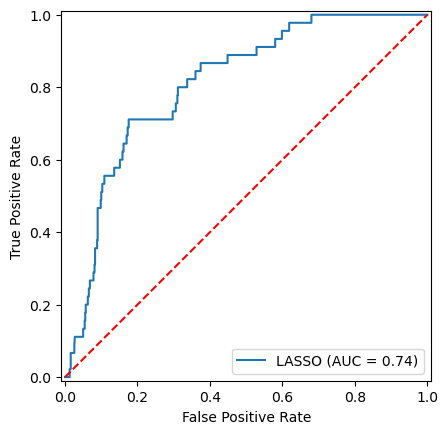

Variables ignoradas por LASSO 2004: ['Intercept', 'educ_medio']
Error Cuadrático Medio (LASSO) 2004: 0.3785234899328859
Matriz de confusión 2024 (LASSO):
 [[554   0]
 [ 25   0]]
Accuracy (LASSO) 2024 : 0.9568221070811744
AUC: 0.500
Thresholds: [       inf 0.35631571 0.31882166 0.2675516  0.23117682 0.23106867
 0.18581691 0.1763848  0.14902174 0.14544098 0.13248912 0.12781687
 0.12613858 0.12504904 0.09415334 0.09309359 0.08778152 0.08708013
 0.08634009 0.08575568 0.07529822 0.07488396 0.069318   0.06897433
 0.06613771 0.06554901 0.06553789 0.06530233 0.05007128 0.04960402
 0.04575619 0.04529707 0.04247628 0.0424554  0.03887103 0.0378413
 0.03155492 0.03149832 0.02621349 0.02605717 0.0231712  0.02312352
 0.02139583 0.02123983 0.00122268 0.001216   0.0001101 ]
FPR: [0.         0.00180505 0.00361011 0.00361011 0.0198556  0.0198556
 0.03971119 0.03971119 0.05415162 0.05415162 0.066787   0.066787
 0.07039711 0.07039711 0.10830325 0.10830325 0.11191336 0.11191336
 0.11552347 0.11552347 0.144

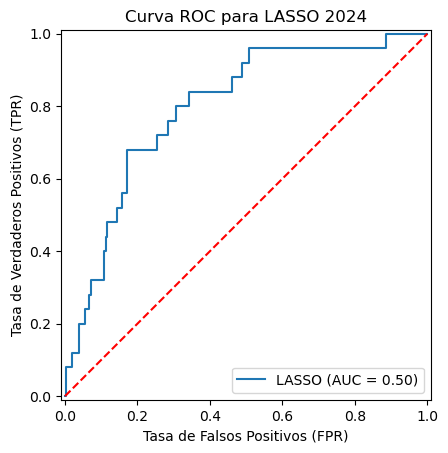

Variables ignoradas por LASSO 2024: ['Intercept', 'educ_medio', 'tenencia_bano', 'basural', 'prestamos_flia', 'prestamos_inst']
Error Cuadrático Medio (LASSO) 2024: 0.04317789291882556


In [204]:
# Regresión logística con penalidad L1 (LASSO)
#2004

model_lasso = LogisticRegression(penalty='l1', solver='liblinear')
model_lasso.fit(X_2004_train_encoded_tr, y_2004_train)

# Predicciones
y_pred_lasso_2004 = model_lasso.predict(X_2004_test_encoded_tr)

# Evaluar el modelo LASSO
#Matriz de confusión
confusion_lasso_2004 = confusion_matrix(y_2004_test, y_pred_lasso_2004)
print("Matriz de confusión 2004 (LASSO):\n", confusion_lasso_2004)

#Accuracy score
accuracy_lasso_2004 = accuracy_score(y_2004_test, y_pred_lasso_2004)
print("Accuracy (LASSO) 2004 :", accuracy_lasso_2004)

#AUC y Curva ROC
roc_auc_lasso_2004 = roc_auc_score(y_2004_test, y_pred_lasso_2004)
print('AUC: %.3f'% roc_auc_lasso_2004)

fpr, tpr, thresholds = roc_curve(y_2004_test, model_lasso.predict_proba(X_2004_test_encoded_tr)[:, 1])
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_lasso_2004, estimator_name='LASSO')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

# Identificar variables ignoradas (coeficientes cero)
ignored_variables_2004= np.where(model_lasso.coef_ == 0)[1]  
ignored_variable_names_2004 = X_2004_train_encoded_tr.columns[ignored_variables_2004].tolist()  # Nombres de variables ignoradas

print("Variables ignoradas por LASSO 2004:", ignored_variable_names_2004)

#ECM
mse_lasso_2004 = mean_squared_error(y_2004_test, y_pred_lasso_2004)
print("Error Cuadrático Medio (LASSO) 2004:", mse_lasso_2004)


# 2024

model_lasso = LogisticRegression(penalty='l1', solver='liblinear')
model_lasso.fit(X_2024_train_encoded_tr, y_2024_train)

# Predicciones
y_pred_lasso_2024 = model_lasso.predict(X_2024_test_encoded_tr)

# Evaluar el modelo LASSO para 2024
# Matriz de confusión
confusion_lasso_2024 = confusion_matrix(y_2024_test, y_pred_lasso_2024)
print("Matriz de confusión 2024 (LASSO):\n", confusion_lasso_2024)

# Accuracy score
accuracy_lasso_2024 = accuracy_score(y_2024_test, y_pred_lasso_2024)
print("Accuracy (LASSO) 2024 :", accuracy_lasso_2024)

# AUC y Curva ROC
roc_auc_lasso_2024 = roc_auc_score(y_2024_test, y_pred_lasso_2024)
print('AUC: %.3f' % roc_auc_lasso_2024)

fpr, tpr, thresholds = roc_curve(y_2024_test, model_lasso.predict_proba(X_2024_test_encoded_tr)[:, 1])
np.set_printoptions(suppress=True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_lasso_2024, estimator_name='LASSO')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC para LASSO 2024')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.show()

# Identificar variables ignoradas (coeficientes cero)
ignored_variables_2024= np.where(model_lasso.coef_ == 0)[1]  
ignored_variable_names_2024 = X_2024_train_encoded_tr.columns[ignored_variables_2024].tolist()  # Nombres de variables ignoradas

print("Variables ignoradas por LASSO 2024:", ignored_variable_names_2024)

#ECM
mse_lasso_2024 = mean_squared_error(y_2024_test, y_pred_lasso_2024)
print("Error Cuadrático Medio (LASSO) 2024:", mse_lasso_2024)

Matriz de confusión 2004 (RIDGE):
 [[470 230]
 [  9  36]]
Accuracy (RIDGE) 2004 : 0.6791946308724832
AUC: 0.736
Thresholds: [       inf 0.9986939  0.99589177 0.99519595 0.99378594 0.99296878
 0.98714026 0.98708557 0.98705842 0.98221857 0.98096538 0.97936928
 0.97872253 0.97860873 0.97798222 0.97777466 0.97776818 0.97153829
 0.97134951 0.97113475 0.97077228 0.95716739 0.95552031 0.95431349
 0.95368035 0.9529021  0.94881232 0.94167845 0.94083068 0.94016326
 0.9391172  0.93877404 0.93812855 0.93705892 0.93684598 0.92453772
 0.92273812 0.92116182 0.91972787 0.91251084 0.91235063 0.90639334
 0.90581133 0.8955179  0.89347701 0.88929882 0.88919299 0.88154656
 0.87961435 0.84531006 0.84514417 0.83370426 0.83317107 0.81479697
 0.81299079 0.81197628 0.80927432 0.61986769 0.61825474 0.60895469
 0.60657448 0.59894756 0.58918766 0.58267477 0.58142574 0.49243975
 0.48664906 0.39477814 0.3944388  0.36523398 0.36462634 0.21126516
 0.20944214 0.06938287 0.06931363 0.06497664 0.06404939 0.04884788
 0.04

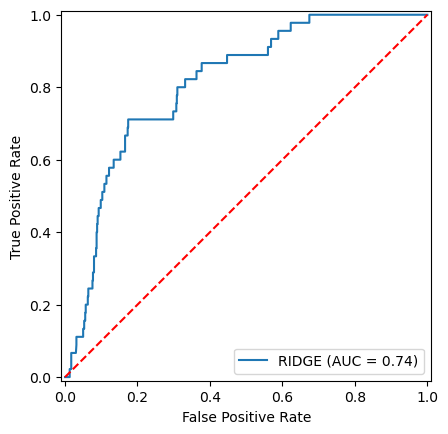

Error Cuadrático Medio (RIDGE) 2004: 0.3785234899328859
Matriz de confusión 2024 (RIDGE):
 [[554   0]
 [ 25   0]]
Accuracy (RIDGE) 2024 : 0.9568221070811744
AUC: 0.500
Thresholds: [       inf 0.3878135  0.34032562 0.28195805 0.24660321 0.24526833
 0.19641033 0.19243123 0.18829851 0.1869664  0.13944635 0.13653525
 0.13160393 0.13087063 0.12001745 0.11865949 0.09653482 0.09563138
 0.09314119 0.09233254 0.09042075 0.08955919 0.08068469 0.08016762
 0.07298938 0.07260849 0.07162777 0.07032181 0.06380864 0.06356459
 0.06265954 0.06236267 0.04594596 0.04592888 0.0430908  0.04302737
 0.03906345 0.03906345 0.03777054 0.03764684 0.02519662 0.02519323
 0.02105841 0.02104443 0.02076331 0.02028286 0.00085704 0.00085296
 0.00006361]
FPR: [0.         0.00180505 0.00361011 0.00361011 0.0198556  0.0198556
 0.03068592 0.03068592 0.03610108 0.03610108 0.06498195 0.06498195
 0.07039711 0.07039711 0.07400722 0.07400722 0.09747292 0.09747292
 0.10830325 0.10830325 0.1101083  0.1101083  0.13357401 0.13357401

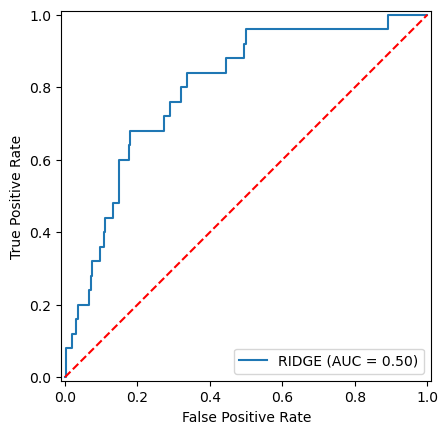

Error Cuadrático Medio (RIDGE) 2004: 0.04317789291882556


In [206]:
# Regresión logística con penalidad L2 (RIDGE)
#2004

model_ridge = LogisticRegression(penalty='l2')
model_ridge.fit(X_2004_train_encoded_tr, y_2004_train)

# Predicciones
y_pred_ridge_2004 = model_ridge.predict(X_2004_test_encoded_tr)

# Evaluar el modelo RIDGE
#Matriz de confusión
confusion_ridge_2004 = confusion_matrix(y_2004_test, y_pred_ridge_2004)
print("Matriz de confusión 2004 (RIDGE):\n", confusion_ridge_2004)

#Accuracy score
accuracy_ridge_2004 = accuracy_score(y_2004_test, y_pred_ridge_2004)
print("Accuracy (RIDGE) 2004 :", accuracy_ridge_2004)

#AUC y Curva ROC
roc_auc_ridge_2004 = roc_auc_score(y_2004_test, y_pred_ridge_2004)
print('AUC: %.3f'% roc_auc_ridge_2004)

fpr, tpr, thresholds = roc_curve(y_2004_test, model_ridge.predict_proba(X_2004_test_encoded_tr)[:, 1])
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_ridge_2004, estimator_name='RIDGE')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

#ECM
mse_ridge_2004 = mean_squared_error(y_2004_test, y_pred_lasso_2004)
print("Error Cuadrático Medio (RIDGE) 2004:", mse_ridge_2004)

# 2024

model_ridge = LogisticRegression(penalty='l2')
model_ridge.fit(X_2024_train_encoded_tr, y_2024_train)

# Predicciones
y_pred_ridge_2024 = model_ridge.predict(X_2024_test_encoded_tr)

# Evaluar el modelo RIDGE
# Matriz de confusión
confusion_ridge_2024 = confusion_matrix(y_2024_test, y_pred_ridge_2024)
print("Matriz de confusión 2024 (RIDGE):\n", confusion_ridge_2024)

# Accuracy score
accuracy_ridge_2024 = accuracy_score(y_2024_test, y_pred_ridge_2024)
print("Accuracy (RIDGE) 2024 :", accuracy_ridge_2024)

# AUC y Curva ROC
roc_auc_ridge_2024 = roc_auc_score(y_2024_test, y_pred_ridge_2024)
print('AUC: %.3f' % roc_auc_ridge_2024)

fpr, tpr, thresholds = roc_curve(y_2024_test, model_ridge.predict_proba(X_2024_test_encoded_tr)[:, 1])
np.set_printoptions(suppress=True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_ridge_2024, estimator_name='RIDGE')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

#ECM
mse_ridge_2024 = mean_squared_error(y_2024_test, y_pred_lasso_2024)
print("Error Cuadrático Medio (RIDGE) 2004:", mse_ridge_2024)

#### Ejercicio 5

In [150]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_classification

In [168]:
# Definimos los valores de lambda
lambdas = [10**n for n in range(-5, 6)]

# Creamos las listas para almacenar los errores de cada lambda
ridge_errors_2004 = []
ridge_errors_2024 = []
lasso_errors_2004 = []
lasso_errors_2024 = []

# 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [170]:
# Iteramos sobre los valores de lambda

# Calculamos los errores para cada lambda
for l in lambdas:
    # Ridge
    model_ridge = LogisticRegression(penalty='l2', C=1/l)
    ridge_cv_scores_2004 = cross_val_score(model_ridge, X_2004_train_encoded_tr, y_2004_train, cv=kf, scoring='neg_log_loss')
    ridge_errors_2004.append(-ridge_cv_scores_2004)  # Almacena el negativo de los scores
    ridge_cv_scores_2024 = cross_val_score(model_ridge, X_2024_train_encoded_tr, y_2024_train, cv=kf, scoring='neg_log_loss')
    ridge_errors_2024.append(-ridge_cv_scores_2024)

    # Lasso
    model_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1/l)
    lasso_cv_scores_2004 = cross_val_score(model_lasso, X_2004_train_encoded_tr, y_2004_train, cv=kf, scoring='neg_log_loss')
    lasso_errors_2004.append(-lasso_cv_scores_2004)  # Almacena el negativo de los scores
    lasso_cv_scores_2024 = cross_val_score(model_lasso, X_2024_train_encoded_tr, y_2024_train, cv=kf, scoring='neg_log_loss')
    lasso_errors_2024.append(-lasso_cv_scores_2024)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [178]:
# Convertir a DataFrame para seaborn
ridge_errors_2004_df = pd.DataFrame(ridge_errors_2004, index=lambdas, columns=[f'Fold {i+1}' for i in range(10)])
ridge_errors_2024_df = pd.DataFrame(ridge_errors_2024, index=lambdas, columns=[f'Fold {i+1}' for i in range(10)])
lasso_errors_2004_df = pd.DataFrame(lasso_errors_2004, index=lambdas, columns=[f'Fold {i+1}' for i in range(10)])
lasso_errors_2024_df = pd.DataFrame(lasso_errors_2024, index=lambdas, columns=[f'Fold {i+1}' for i in range(10)])


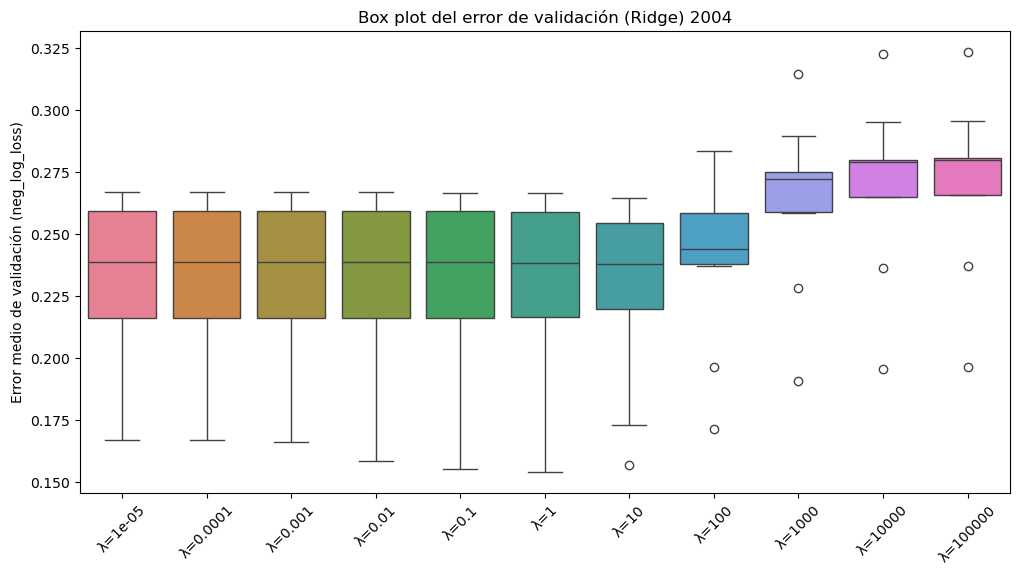

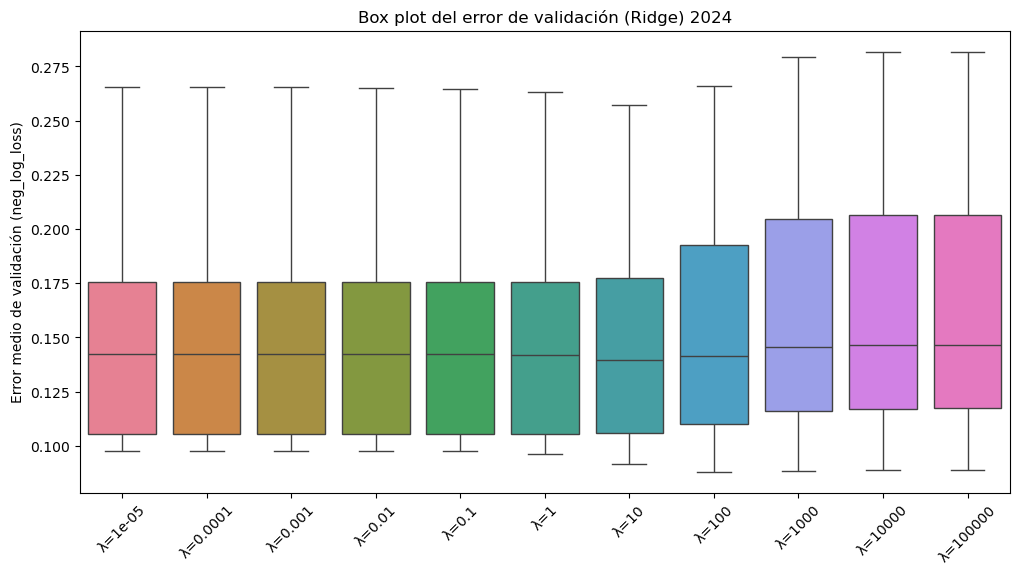

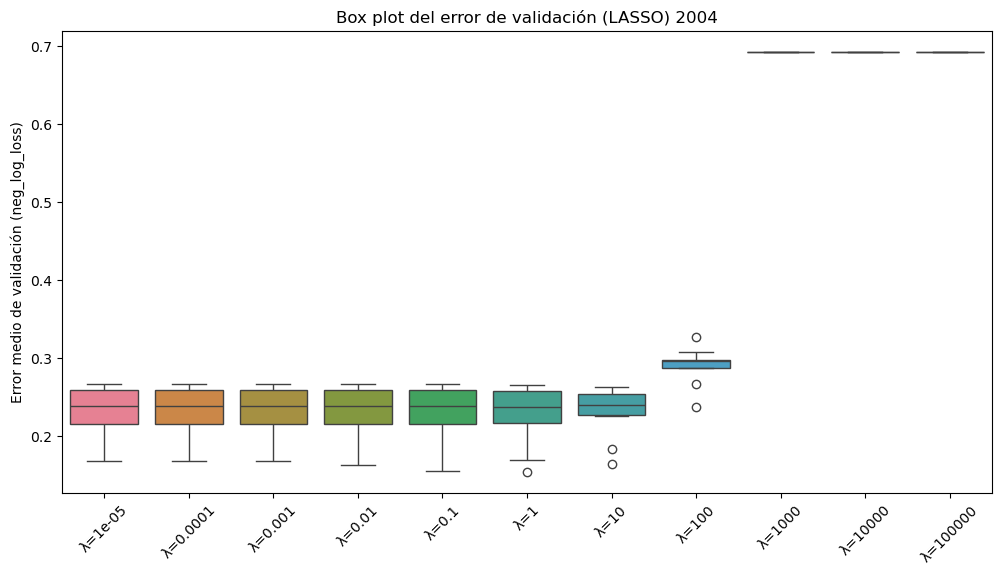

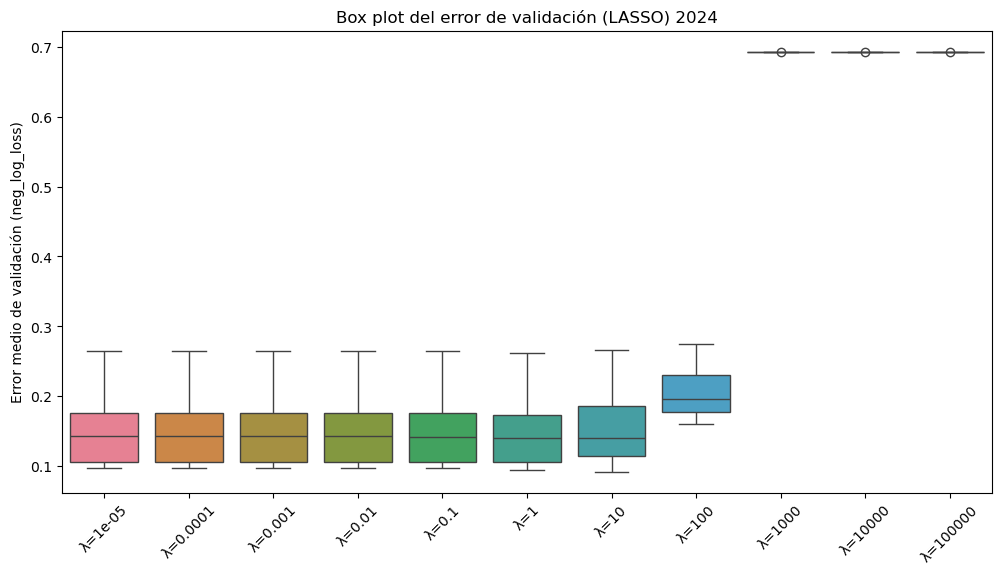

In [180]:
# Box plot para Ridge 2004
plt.figure(figsize=(12, 6))
sns.boxplot(data=ridge_errors_2004_df.T)
plt.xticks(ticks=range(len(lambdas)), labels=[f'λ={l}' for l in lambdas], rotation=45)
plt.title('Box plot del error de validación (Ridge) 2004')
plt.ylabel('Error medio de validación (neg_log_loss)')
plt.show()

# Box plot para Ridge 2024
plt.figure(figsize=(12, 6))
sns.boxplot(data=ridge_errors_2024_df.T)
plt.xticks(ticks=range(len(lambdas)), labels=[f'λ={l}' for l in lambdas], rotation=45)
plt.title('Box plot del error de validación (Ridge) 2024')
plt.ylabel('Error medio de validación (neg_log_loss)')
plt.show()

# Box plot para LASSO 2004
plt.figure(figsize=(12, 6))
sns.boxplot(data=lasso_errors_2004_df.T)
plt.xticks(ticks=range(len(lambdas)), labels=[f'λ={l}' for l in lambdas], rotation=45)
plt.title('Box plot del error de validación (LASSO) 2004')
plt.ylabel('Error medio de validación (neg_log_loss)')
plt.show()

# Box plot para LASSO 2024
plt.figure(figsize=(12, 6))
sns.boxplot(data=lasso_errors_2024_df.T)
plt.xticks(ticks=range(len(lambdas)), labels=[f'λ={l}' for l in lambdas], rotation=45)
plt.title('Box plot del error de validación (LASSO) 2024')
plt.ylabel('Error medio de validación (neg_log_loss)')
plt.show()

In [184]:
# Seleccionar el λ óptimo para ambos modelos
optimal_lambda_ridge_2004 = lambdas[np.argmin(np.mean(ridge_errors_2004, axis=1))]
optimal_lambda_lasso_2004 = lambdas[np.argmin(np.mean(lasso_errors_2004, axis=1))]
optimal_lambda_ridge_2024 = lambdas[np.argmin(np.mean(ridge_errors_2024, axis=1))]
optimal_lambda_lasso_2024 = lambdas[np.argmin(np.mean(lasso_errors_2024, axis=1))]

print(f'λ óptimo para Ridge 2004: {optimal_lambda_ridge_2004}')
print(f'λ óptimo para LASSO 2004: {optimal_lambda_lasso_2004}')
print(f'λ óptimo para Ridge 2024: {optimal_lambda_ridge_2024}')
print(f'λ óptimo para LASSO 2024: {optimal_lambda_lasso_2024}')

λ óptimo para Ridge 2004: 10
λ óptimo para LASSO 2004: 1
λ óptimo para Ridge 2024: 10
λ óptimo para LASSO 2024: 1


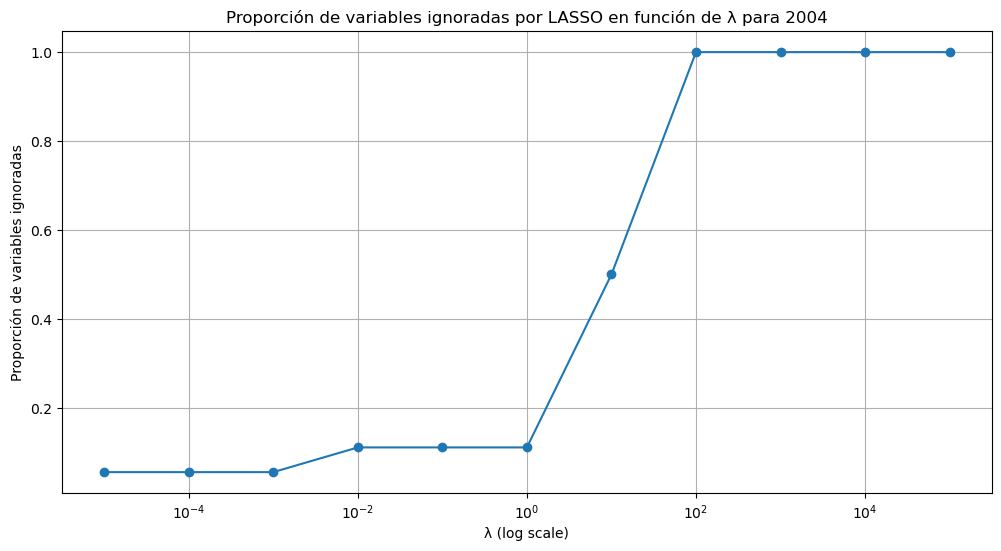

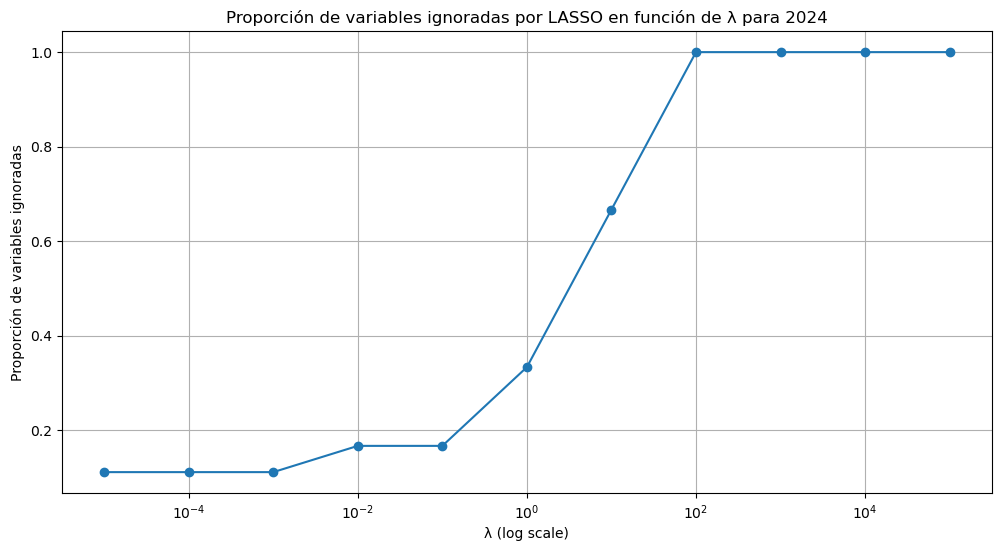

In [188]:
# Creamos listas para guardar los resultados
lasso_variable_proportions_2004 = []
lasso_variable_proportions_2024 = []

# Iteramos sobre cada valor de lambda
for l in lambdas:
    # LASSO para 2004
    model_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1/l)
    model_lasso.fit(X_2004_train_encoded_tr, y_2004_train)
    proportion_ignored_2004 = np.mean(model_lasso.coef_ == 0)
    lasso_variable_proportions_2004.append(proportion_ignored_2004)

    # LASSO para 2024
    model_lasso.fit(X_2024_train_encoded_tr, y_2024_train)
    proportion_ignored_2024 = np.mean(model_lasso.coef_ == 0)
    lasso_variable_proportions_2024.append(proportion_ignored_2024)

# Graficar la proporción de variables ignoradas para LASSO 2004
plt.figure(figsize=(12, 6))
plt.plot(lambdas, lasso_variable_proportions_2004, marker='o')
plt.xscale('log')
plt.title('Proporción de variables ignoradas por LASSO en función de λ para 2004')
plt.xlabel('λ (log scale)')
plt.ylabel('Proporción de variables ignoradas')
plt.grid()
plt.show()

# Graficar la proporción de variables ignoradas para LASSO 2024
plt.figure(figsize=(12, 6))
plt.plot(lambdas, lasso_variable_proportions_2024, marker='o')
plt.xscale('log')
plt.title('Proporción de variables ignoradas por LASSO en función de λ para 2024')  # Cambié el título aquí
plt.xlabel('λ (log scale)')
plt.ylabel('Proporción de variables ignoradas')
plt.grid()
plt.show()